# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

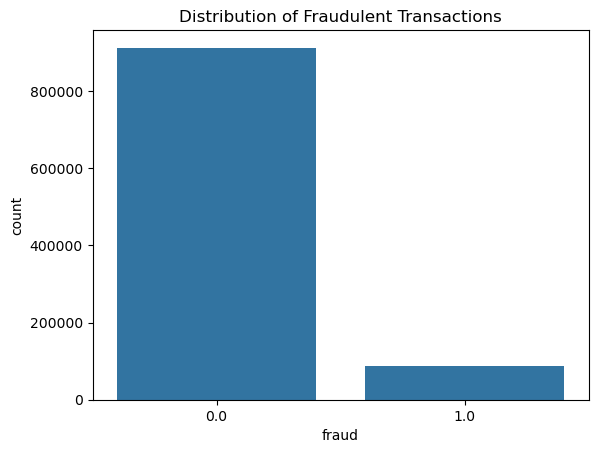

fraud
0.0    912597
1.0     87403
Name: count, dtype: int64


In [4]:
#1. Target Variable Distribution and Dataset Balance
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='fraud', data=fraud)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

# Check the count of each class
fraud_count = fraud['fraud'].value_counts()
print(fraud_count)



In [5]:
#2. Train a Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))



Accuracy: 0.95864
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    182557
         1.0       0.89      0.60      0.72     17443

    accuracy                           0.96    200000
   macro avg       0.93      0.80      0.85    200000
weighted avg       0.96      0.96      0.95    200000



In [ ]:
#3. Evaluate the Model with Class Importance
#In imbalanced datasets, accuracy is not enough. You should focus on metrics like precision, recall, and F1-score, especially for the minority class (fraudulent transactions).

In [7]:
#4. Oversampling the Minority Class
from imblearn.over_sampling import RandomOverSampler

# Apply oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

# Train the Logistic Regression again
logreg.fit(X_resampled, y_resampled)
y_pred_resampled = logreg.predict(X_test)

# Evaluate
print("Accuracy after Oversampling:", accuracy_score(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))


Accuracy after Oversampling: 0.93468
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [8]:
#5. Undersampling the Majority Class
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

# Train and evaluate
logreg.fit(X_resampled, y_resampled)
y_pred_resampled = logreg.predict(X_test)

print("Accuracy after Undersampling:", accuracy_score(y_test, y_pred_resampled))
print(classification_report(y_test, y_pred_resampled))



Accuracy after Undersampling: 0.934505
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000



In [9]:
#6. Using SMOTE for Synthetic Sampling
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Train and evaluate
logreg.fit(X_smote, y_smote)
y_pred_smote = logreg.predict(X_test)

print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


Accuracy after SMOTE: 0.935085
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182557
         1.0       0.58      0.95      0.72     17443

    accuracy                           0.94    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.94      0.94    200000



Conclusions:

The dataset is highly imbalanced, with 912,597 non-fraudulent transactions (0.0) and only 87,403 fraudulent transactions (1.0). 
This imbalance creates a significant challenge for the model to accurately predict fraudulent transactions without favoring the majority class.

After oversampling, the recall for fraudulent transactions increased significantly to 0.95, meaning the model correctly identifies 95% of fraud cases. However, precision (0.58) is lower, indicating a higher rate of false positives, where the model incorrectly labels non-fraudulent transactions as fraud.

he performance of undersampling is almost identical to oversampling. While the accuracy remains high at 93.45%, precision and recall show the same trend as oversampling. However, undersampling may have lost some valuable information by reducing the majority class, which is a potential limitation.

MOTE produced very similar results to both oversampling and undersampling. While the recall for fraud cases remains high (0.95), precision is still lower (0.58), indicating a higher false-positive rate. However, SMOTE strikes a good balance by generating synthetic samples, preserving more information compared to undersampling.

All three techniques—oversampling, undersampling, and SMOTE—improved the model's ability to identify fraudulent transactions, particularly in terms of recall, which is essential in fraud detection.